# Cancer

Source - https://github.com/midtown-ai/notebooks/blob/main/postpruning.ipynb

In [13]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

%matplotlib inline

# Cancer


## Import data

In [2]:
X, y = load_breast_cancer(return_X_y=True)

## Build model


In [4]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [5]:
clf = DecisionTreeClassifier()
path = clf.cost_complexity_pruning_path(X_train, y_train)
path

# We want ccp_alpha as high as possible 
# and the impurity as low as possible (or acceptable for the given ccp_alpha)

{'ccp_alphas': array([0.        , 0.00226647, 0.00464743, 0.0046598 , 0.0056338 ,
        0.00704225, 0.00784194, 0.00911402, 0.01144366, 0.018988  ,
        0.02314163, 0.03422475, 0.32729844]),
 'impurities': array([0.        , 0.00453294, 0.01847522, 0.02313502, 0.02876883,
        0.03581108, 0.04365302, 0.05276704, 0.0642107 , 0.0831987 ,
        0.10634033, 0.14056508, 0.46786352])}

Text(0, 0.5, 'total impurity of leaves')

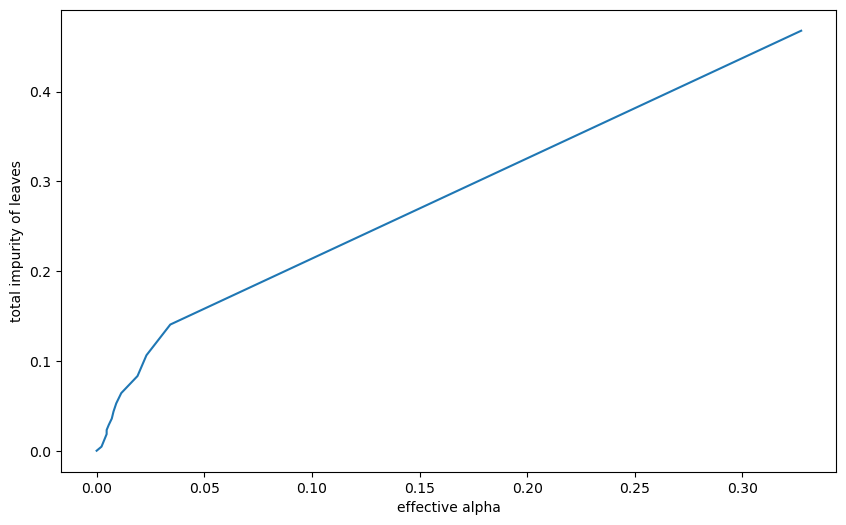

In [6]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("effective alpha")
plt.ylabel("total impurity of leaves")

In [7]:
clfs = []

# ccp_alpha controls the depth of the tree?
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

Text(0, 0.5, 'total depth')

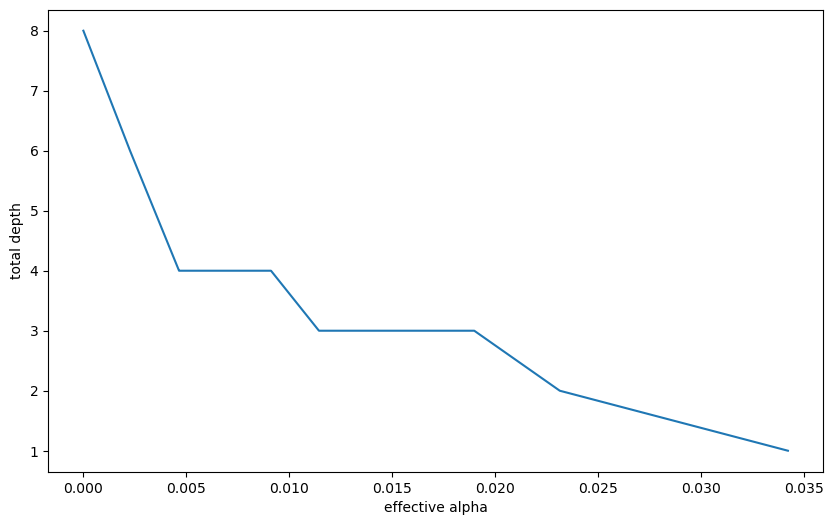

In [10]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("total depth")

Text(0, 0.5, 'Accuracy scores')

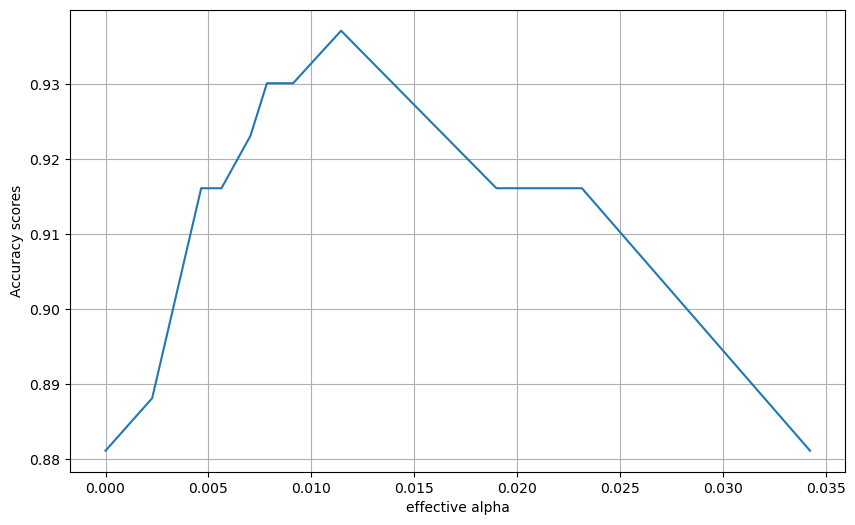

In [17]:
acc_scores = [accuracy_score(y_test, clf.predict(X_test)) for clf in clfs]

tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.grid()
plt.plot(ccp_alphas[:-1], acc_scores[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Accuracy scores")

# notice that the effective alpha of 0.13 is best
# That correspond to a depth of 3 (see diagram above)

# Benefit: more performant, less overfitting, and higher accuracy!